In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf


from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV,validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#from skopt import BayesSearchCV

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials,rand
from hyperopt.pyll.base import scope 

def mae(y_orig,y_pred):
    abs_error = abs(y_orig-y_pred)
    return (np.mean(abs_error) / np.mean(y_orig))*100
def rmse(y_true,y_pred):
    return (mse(y_true,y_pred))**0.5
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter("ignore")





In [2]:
df = pd.read_excel('DATA.xlsx',dtype=np.longfloat)
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df = imputer.fit_transform(df)
X = df[:,:-1]
y = df[:,9]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=22)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=22)

scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_val_sca = scaler.transform(X_val)
X_test_sca = scaler.transform(X_test)


In [3]:
print("Size of Training = ",y_train.shape)
print("Size of Validation",y_val.shape)
print("Size of Testing",y_test.shape)

Size of Training =  (11241,)
Size of Validation (1250,)
Size of Testing (1388,)


# 1 Layer

In [9]:
arr = ([10,10,10,10,10])
model = MLPRegressor(hidden_layer_sizes=arr,shuffle=True,random_state=22)


model.fit(X_train_sca,y_train)
print("Initial Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))

Initial Model
---------------------------------------------
Training Score
R2 ->  0.7878784486781749
MSE ->  2.3686082309479577
RMSE ->  1.5390283398781055
MAE ->  13.021677836542933
---------------------------------------------
Validation Score
R2 ->  0.7764693263413412
MSE ->  2.5678811857825985
RMSE ->  1.6024609779281986
MAE ->  13.869779672161595
---------------------------------------------
Test Score
R2 ->  0.7530884354963583
MSE ->  2.5521095311265745
RMSE ->  1.5975323255341578
MAE ->  13.344508709948594


In [26]:
train = np.zeros(50)
val = np.zeros(50)
test = np.zeros(50)

In [28]:
for i in range(1,51):
    arr = ([i])
    model = MLPRegressor(hidden_layer_sizes=arr,shuffle=True,random_state=22)
    model.fit(X_train_sca,y_train)
    train[i-1] = r2(y_train,model.predict(X_train_sca))
    val[i-1] = r2(y_val,model.predict(X_val_sca))
    test[i-1] = r2(y_test,model.predict(X_test_sca))




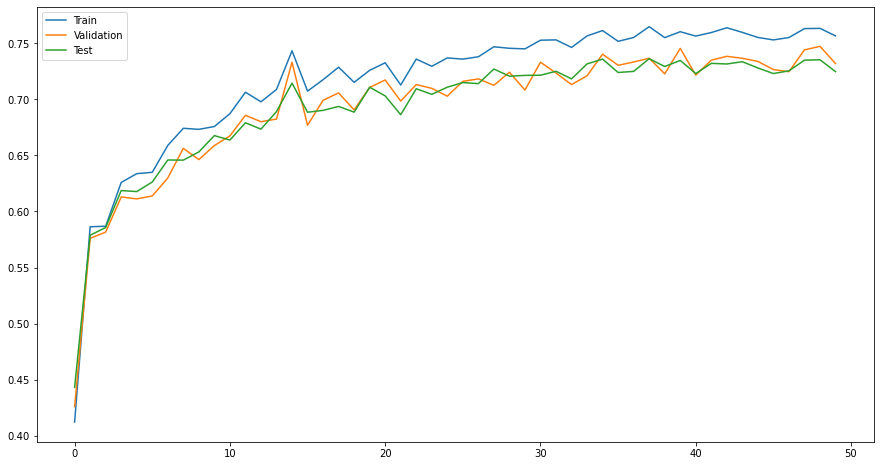

In [37]:
plt.figure(figsize=(15,8))
plt.plot(train,label = "Train")
plt.plot(val,label = "Validation")
plt.plot(test,label = "Test")
plt.legend()
plt.show()

In [40]:
n_evals = 100
space = {'a': scope.int (hp.quniform('a', 5,100,5)),
         #'b': scope.int (hp.quniform('b', 5,100,10)),
         #'c': scope.int (hp.quniform('c', 5,100,10)),
         #'d': scope.int (hp.quniform('d', 5,100,10)),
         #'e': scope.int (hp.quniform('e', 5,100,10)),
         'activation': hp.choice('activation',['relu','logistic','identity','tanh']),
         #'batch_size': hp.choice ('batch_size', [16,32,64,128]),
         #'max_iter' : hp.choice('max_iter', [500,600]),
         'beta_1':hp.uniform('beta_1',0.0001,0.99999),
         'beta_2':hp.uniform('beta_2',0.0001,0.99999),
         #'learning_rate_init':hp.choice('learning_rate_init',[0.001,0.01,0.1,0.2])
         
         
    }
def objective(space):
    
    arr = ([space['a']])
    
    model = MLPRegressor(hidden_layer_sizes=arr,activation=space['activation'],batch_size=128,max_iter=600,
                         solver='adam',
                        beta_1=space['beta_1'],beta_2=space['beta_2'],shuffle=True,random_state=22)
    
    model.fit(X_train_sca,y_train)
    y_val_pred = model.predict(X_val_sca)
    MSE = mse(y_val,y_val_pred)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': MSE, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            trials= trials,
               max_evals=n_evals)
best

100%|██████████| 100/100 [45:10<00:00, 27.11s/trial, best loss: 2.2863497484353412]


{'a': 100.0,
 'activation': 3,
 'beta_1': 0.585966932155465,
 'beta_2': 0.5933895789649293}

In [42]:
arr = ([100])
beta_1 = 0.585966932155465
beta_2 = 0.5933895789649293
activation='tanh'
batch_size = 128
max_iter = 600


model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22)


model.fit(X_train_sca,y_train)

print("1 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


1 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8156501011748145
MSE ->  2.0585022361508187
RMSE ->  1.4347481438046257
MAE ->  12.064125183770544
---------------------------------------------
Validation Score
R2 ->  0.8009762670030618
MSE ->  2.2863497484353412
RMSE ->  1.5120680369729866
MAE ->  12.950049836097177
---------------------------------------------
Test Score
R2 ->  0.7678734959127491
MSE ->  2.3992892544303133
RMSE ->  1.548963929350943
MAE ->  13.182836123745489


# 2 Layers

In [11]:
n_evals = 70
space = {'a': scope.int (hp.quniform('a', 5,100,5)),
         'b': scope.int (hp.quniform('b', 5,100,5)),
         #'c': scope.int (hp.quniform('c', 5,100,5)),
         #'d': scope.int (hp.quniform('d', 5,100,10)),
         #'e': scope.int (hp.quniform('e', 5,100,10)),
         'activation': hp.choice('activation',['relu','logistic','identity','tanh']),
         #'batch_size': hp.choice ('batch_size', [16,32,64,128]),
         #'max_iter' : hp.choice('max_iter', [500,600]),
         'beta_1':hp.uniform('beta_1',0.0001,0.99999),
         'beta_2':hp.uniform('beta_2',0.0001,0.99999),
         'alpha':hp.uniform('alpha',0.0001,0.99999),
         #'learning_rate_init':hp.choice('learning_rate_init',[0.001,0.01,0.1,0.2])
         
         
    }
def objective(space):
    
    arr = ([space['a'],space['b']])
    
    model = MLPRegressor(hidden_layer_sizes=arr,activation=space['activation'],batch_size=128,max_iter=600,
                         solver='adam',
                        beta_1=space['beta_1'],beta_2=space['beta_2'],shuffle=True,random_state=22,alpha=space['alpha'])
    
    model.fit(X_train_sca,y_train)
    y_val_pred = model.predict(X_val_sca)
    MSE = mse(y_val,y_val_pred)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': MSE, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            trials= trials,
               max_evals=n_evals)
best

100%|██████████| 70/70 [24:52<00:00, 21.32s/trial, best loss: 1.9479621194257726]


{'a': 65.0,
 'activation': 3,
 'alpha': 0.1068575068944329,
 'b': 45.0,
 'beta_1': 0.7129220114520691,
 'beta_2': 0.2750840525880057}

In [15]:
arr = ([65,45])
beta_1 = 0.7129
beta_2 = 0.275
activation='tanh'
batch_size = 128
max_iter = 600
alpha = 0.106


model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)


model.fit(X_train_sca,y_train)

print("2 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


2 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8585393340036516
MSE ->  1.5795891353160036
RMSE ->  1.2568170651753594
MAE ->  10.573846170404515
---------------------------------------------
Validation Score
R2 ->  0.8306104013867224
MSE ->  1.9459180085974404
RMSE ->  1.3949616512999345
MAE ->  12.02332828052591
---------------------------------------------
Test Score
R2 ->  0.8089589615043304
MSE ->  1.974624623845539
RMSE ->  1.4052133730667165
MAE ->  11.821638684450349


# 3 Layers

In [13]:
n_evals = 70
space = {'a': scope.int (hp.quniform('a', 5,100,5)),
         'b': scope.int (hp.quniform('b', 5,100,5)),
         'c': scope.int (hp.quniform('c', 5,100,5)),
         #'d': scope.int (hp.quniform('d', 5,100,10)),
         #'e': scope.int (hp.quniform('e', 5,100,10)),
         'activation': hp.choice('activation',['relu','logistic','identity','tanh']),
         #'batch_size': hp.choice ('batch_size', [16,32,64,128]),
         #'max_iter' : hp.choice('max_iter', [500,600]),
         'beta_1':hp.uniform('beta_1',0.0001,0.99999),
         'beta_2':hp.uniform('beta_2',0.0001,0.99999),
         'alpha':hp.uniform('alpha',0.0001,0.99999),
         #'learning_rate_init':hp.choice('learning_rate_init',[0.001,0.01,0.1,0.2])
         
         
    }
def objective(space):
    
    arr = ([space['a'],space['b'],space['c']])
    
    model = MLPRegressor(hidden_layer_sizes=arr,activation=space['activation'],batch_size=128,max_iter=600,
                         solver='adam',
                        beta_1=space['beta_1'],beta_2=space['beta_2'],shuffle=True,random_state=22,alpha=space['alpha'])
    
    model.fit(X_train_sca,y_train)
    y_val_pred = model.predict(X_val_sca)
    MSE = mse(y_val,y_val_pred)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': MSE, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            trials= trials,
               max_evals=n_evals)
best

100%|██████████| 70/70 [42:34<00:00, 36.50s/trial, best loss: 1.6037923206630467]


{'a': 70.0,
 'activation': 3,
 'alpha': 0.034429101174577384,
 'b': 80.0,
 'beta_1': 0.6482935693860953,
 'beta_2': 0.9941277670207687,
 'c': 55.0}

In [19]:
arr = ([70,80,55])
beta_1 = 0.6482
beta_2 = 0.994
activation='tanh'
batch_size = 128
max_iter = 600
alpha = 0.5


model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)


model.fit(X_train_sca,y_train)

print("3 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


3 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8163130639867242
MSE ->  2.051099409029687
RMSE ->  1.4321659851531479
MAE ->  11.96995081613921
---------------------------------------------
Validation Score
R2 ->  0.8065328666201645
MSE ->  2.2225165063118295
RMSE ->  1.4908106876165832
MAE ->  12.587906750123635
---------------------------------------------
Test Score
R2 ->  0.7863016623419834
MSE ->  2.208813367730637
RMSE ->  1.4862077135214435
MAE ->  12.62496018954563


# 4 Layers

In [12]:
n_evals = 70
space = {'a': scope.int (hp.quniform('a', 5,100,5)),
         'b': scope.int (hp.quniform('b', 5,100,5)),
         'c': scope.int (hp.quniform('c', 5,100,5)),
         'd': scope.int (hp.quniform('d', 5,100,10)),
         #'e': scope.int (hp.quniform('e', 5,100,10)),
         'activation': hp.choice('activation',['relu','logistic','identity','tanh']),
         #'batch_size': hp.choice ('batch_size', [16,32,64,128]),
         #'max_iter' : hp.choice('max_iter', [500,600]),
         'beta_1':hp.uniform('beta_1',0.0001,0.99999),
         'beta_2':hp.uniform('beta_2',0.0001,0.99999),
         'alpha':hp.uniform('alpha',0.0001,0.99999),
         #'learning_rate_init':hp.choice('learning_rate_init',[0.001,0.01,0.1,0.2])
         
         
    }
def objective(space):
    
    arr = ([space['a'],space['b'],space['c'],space['d']])
    
    model = MLPRegressor(hidden_layer_sizes=arr,activation=space['activation'],batch_size=128,max_iter=600,
                         solver='adam',
                        beta_1=space['beta_1'],beta_2=space['beta_2'],shuffle=True,random_state=22,alpha=space['alpha'])
    
    model.fit(X_train_sca,y_train)
    y_val_pred = model.predict(X_val_sca)
    MSE = mse(y_val,y_val_pred)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': MSE, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            trials= trials,
               max_evals=n_evals)
best

100%|██████████| 70/70 [52:47<00:00, 45.25s/trial, best loss: 1.43620292811289]  


{'a': 100.0,
 'activation': 3,
 'alpha': 0.060062422128752034,
 'b': 90.0,
 'beta_1': 0.29403499676898914,
 'beta_2': 0.28004717160632686,
 'c': 75.0,
 'd': 30.0}

In [18]:
arr = ([100,90,75,30])
beta_1 = 0.294
beta_2 = 0.28
activation='tanh'
batch_size = 128
max_iter = 600
alpha = 0.5

model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)


model.fit(X_train_sca,y_train)

print("4 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


4 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8334923285195583
MSE ->  1.8592709638738807
RMSE ->  1.3635508658916544
MAE ->  11.393395589262992
---------------------------------------------
Validation Score
R2 ->  0.8097642344574747
MSE ->  2.1853951191753023
RMSE ->  1.4783081949225954
MAE ->  12.13501890323854
---------------------------------------------
Test Score
R2 ->  0.8046642170625475
MSE ->  2.0190156520489406
RMSE ->  1.4209207057569893
MAE ->  12.210226999314612


In [24]:
np.arange(0,1.01,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [25]:
train = np.zeros(21)
val = np.zeros(21)
test = np.zeros(21)
x_axis = np.arange(0,1.01,0.05)
j=0
a=0
for i in range(0,21):
    arr = ([100,90,75,30])
    beta_1 = 0.294
    beta_2 = 0.28
    activation='tanh'
    batch_size = 128
    max_iter = 600
    alpha = a
    model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)
    model.fit(X_train_sca,y_train)
    train[j] = r2(y_train,model.predict(X_train_sca))
    val[j] = r2(y_val,model.predict(X_val_sca))
    test[j] = r2(y_test,model.predict(X_test_sca))
    j=j+1
    a=a+0.05




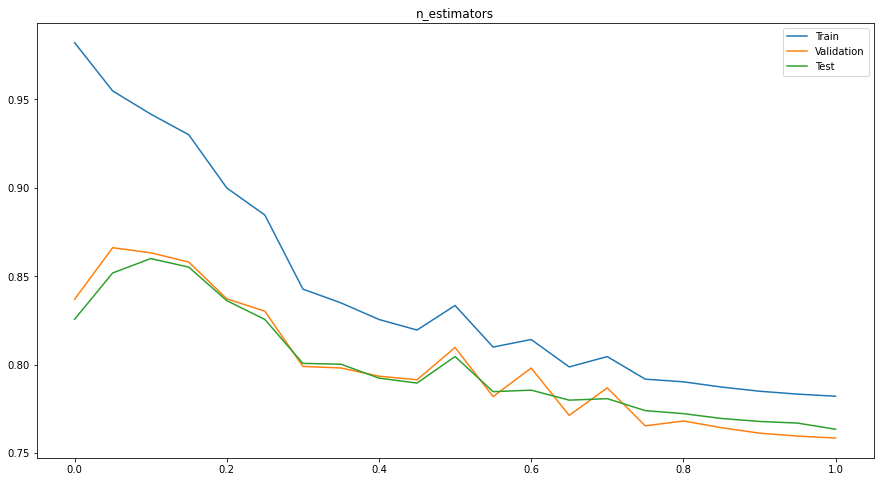

In [26]:
plt.figure(figsize=(15,8))
plt.title("n_estimators")
plt.plot(x_axis,train,label = "Train")
plt.plot(x_axis,val,label = "Validation")
plt.plot(x_axis,test,label = "Test")
plt.legend()
plt.show()

In [28]:
model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=0.5)
model.fit(X_train_sca,y_train)

print("4 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))

4 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8334923285195583
MSE ->  1.8592709638738807
RMSE ->  1.3635508658916544
MAE ->  11.393395589262992
---------------------------------------------
Validation Score
R2 ->  0.8097642344574747
MSE ->  2.1853951191753023
RMSE ->  1.4783081949225954
MAE ->  12.13501890323854
---------------------------------------------
Test Score
R2 ->  0.8046642170625475
MSE ->  2.0190156520489406
RMSE ->  1.4209207057569893
MAE ->  12.210226999314612
